<a href="https://colab.research.google.com/github/christiangarza1505813/PCD/blob/main/Tarea%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [54]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
import re

In [55]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
df['uppercase_count'] = df['text'].apply(lambda x: len(re.findall(r'[A-Z]', str(x))))
df['special_char_count'] = df['text'].apply(lambda x: len(re.findall(r'[^A-Za-z0-9\s]', str(x))))
df['number_count'] = df['text'].apply(lambda x: len(re.findall(r'\d', str(x))))
spam_keywords_en2 = [
    'free', 'win', 'prize', 'cash', 'offer',
    'click', 'guaranteed', 'congratulations', 'selected',
    'deal', 'discount', 'limited', 'urgent', 'winner',
    'claim',  'exclusive', 'act now', 'apply now',
    'credit', 'loan',  'price', 'save',
    'income', 'profit', 'risk', 'bonus', 'order',
    'subscription', 'payment', 'card', 'expire', 'dollar',
    'million', 'only', 'instant',  'now','trial'
]
spam_keywords_en = [
    'free', 'win', 'prize', 'cash', 'offer',
    'click', 'guaranteed', 'congratulations', 'selected',
    'deal', 'discount', 'limited', 'urgent', 'winner',
    'claim', 'exclusive', 'act now', 'apply now',
    'credit', 'loan', 'price', 'save', 'income',
    'profit', 'risk', 'bonus', 'order', 'subscription',
    'payment', 'card', 'expire', 'dollar', 'million',
    'only', 'instant', 'now', 'trial', 'opportunity',
    'urgent matter', 'weight loss', 'no fees', 'cheap',
    'limited time', 'unclaimed', 'financial freedom',
    'lottery', 'risk-free', 'pharmacy', 'no prescription',
]


# Contar ocurrencias de palabras clave en cada texto
df['spam_keyword_count'] = df['text'].apply(
    lambda x: sum(x.lower().count(keyword) for keyword in spam_keywords_en)
)
df['has_spam_keyword'] = df['text'].apply(
    lambda x: int(any(keyword in x.lower() for keyword in spam_keywords_en))
)



display(df.head())

,label,text,word_count,char_count,uppercase_count,special_char_count,number_count,spam_keyword_count,has_spam_keyword
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,3,9,0,1,1
1,ham,Ok lar... Joking wif u oni...,6,29,2,6,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,10,6,25,2,1
3,ham,U dun say so early hor... U c already then say...,11,49,2,6,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,2,2,0,0,0


<Axes: xlabel='label', ylabel='spam_keyword_count'>

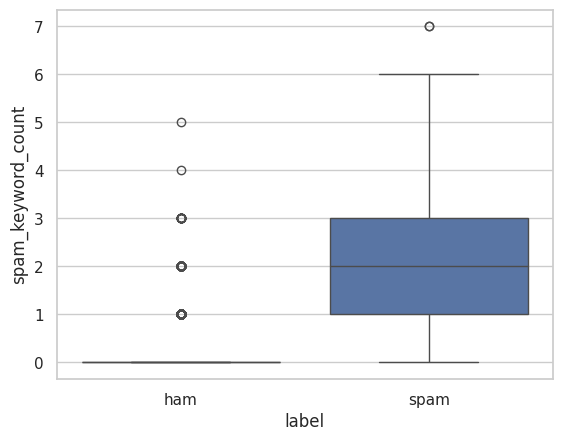

In [99]:
import seaborn as sns
sns.boxplot(x='label', y='spam_keyword_count', data=df)

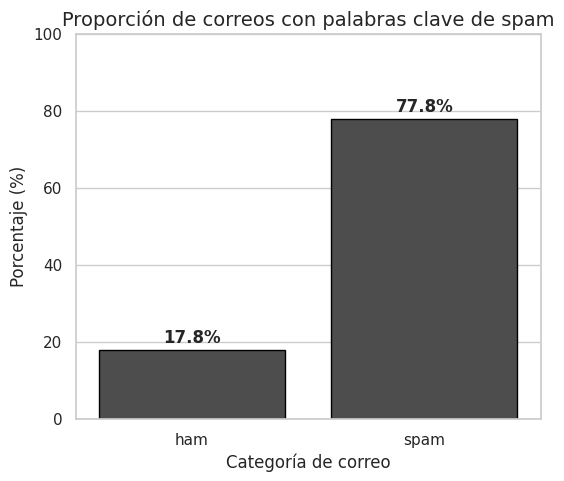

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulación de DataFrame (sustituye esto con la carga de tu dataset real)
# df = pd.read_csv("tu_archivo.csv")

# Calcular proporción de correos con palabras spam dentro de cada categoría
percentages = df.groupby('label')['has_spam_keyword'].mean() * 100  # Promedio de "1" en has_spam_keyword

# Crear el gráfico de barras con color gris oscuro
plt.figure(figsize=(6, 5))
sns.barplot(x=percentages.index, y=percentages.values, color='#4D4D4D', edgecolor='black')

# Personalización del gráfico
plt.title('Proporción de correos con palabras clave de spam', fontsize=14)
plt.xlabel('Categoría de correo', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.ylim(0, 100)  # Escalar a porcentaje
plt.xticks(rotation=0)

# Mostrar porcentaje en cada barra
for index, value in enumerate(percentages.values):
    plt.text(index, value + 2, f"{value:.1f}%", ha='center', fontsize=12, fontweight='bold')

# Mostrar gráfico
plt.show()



In [57]:
df.drop(['text'], axis=1, inplace=True)

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [123]:

X = df[["word_count",	"char_count",	"uppercase_count",	"special_char_count",	"number_count",	"spam_keyword_count",	"has_spam_keyword"]]  # Ejemplo de columnas numéricas
y = df['label'].map({'ham': 0, 'spam': 1})    # Conviertes ham/spam a 0/1

# 2. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1505813,
    stratify=y
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)
print("Shape de X_train_scaled:", X_train_scaled.shape)
print("Shape de X_test_scaled:", X_test_scaled.shape)

Shape de X_train_scaled: (4457, 7)
Shape de X_test_scaled: (1115, 7)


In [124]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Verifica
X_train_scaled.head()

,word_count,char_count,uppercase_count,special_char_count,number_count,spam_keyword_count,has_spam_keyword
0,0.635122,0.494607,-0.138512,2.123154,-0.380948,0.651738,1.704765
1,-0.570144,-0.666197,2.095336,-0.297437,-0.380948,-0.468076,-0.586591
2,0.118580,-0.143017,-0.317219,-0.297437,-0.380948,0.651738,1.704765
3,-0.656235,-0.715245,-0.406573,-0.700869,-0.380948,-0.468076,-0.586591
4,-0.742325,-0.796992,-0.406573,-0.700869,-0.380948,-0.468076,-0.586591


In [121]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Configuraciones a probar
class_weights = ['balanced', None]  # 'balanced' o sin pesos (None)
thresholds = [0.20, 0.50, 0.80]

# Lista para guardar los resultados
results = []

for cw in class_weights:
    for th in thresholds:
        # 1. Instanciamos el modelo con la configuración de class_weight
        rf = RandomForestClassifier(
            class_weight=cw,
            n_estimators=100,
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            random_state=1505813
        )

        # 2. Entrenamos el modelo
        rf.fit(X_train_scaled, y_train)

        # 3. Obtenemos las probabilidades de la clase 1
        y_proba = rf.predict_proba(X_test_scaled)[:, 1]

        # 4. Aplicamos el umbral para generar predicciones
        y_pred_custom = (y_proba >= th).astype(int)

        # 5. Calculamos la matriz de confusión
        cm = confusion_matrix(y_test, y_pred_custom)
        tn, fp, fn, tp = cm.ravel()

        # 6. Calculamos precision y recall
        precision = precision_score(y_test, y_pred_custom)
        recall = recall_score(y_test, y_pred_custom)

        # 7. Guardamos resultados
        results.append({
            'class_weight': cw if cw else 'None',
            'threshold': th,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'TP': tp,
            'precision (%)': round(precision * 100, 2),
            'recall (%)': round(recall * 100, 2)
        })

# Creamos un DataFrame para ver los resultados
results_df = pd.DataFrame(results)
results_df


,class_weight,threshold,TN,FP,FN,TP,precision (%),recall (%)
0,balanced,0.2,954,12,15,134,91.78,89.93
1,balanced,0.5,964,2,22,127,98.45,85.23
2,balanced,0.8,965,1,30,119,99.17,79.87
3,None,0.2,953,13,15,134,91.16,89.93
4,None,0.5,964,2,19,130,98.48,87.25
5,None,0.8,965,1,28,121,99.18,81.21


In [125]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

# Configuraciones a probar
class_weights = [None, 'balanced']  # Sin balance o con balance
thresholds = [0.20, 0.50, 0.80]

# Lista para guardar resultados
results = []

for cw in class_weights:
    for th in thresholds:
        # 1. Instanciamos el modelo LogisticRegression
        model = LogisticRegression(class_weight=cw, random_state=1505813)
        model.fit(X_train, y_train)

        # 2. Obtenemos las probabilidades de la clase positiva (spam=1)
        y_proba = model.predict_proba(X_test)[:, 1]

        # 3. Aplicamos el umbral
        y_pred_custom = (y_proba >= th).astype(int)

        # 4. Calculamos la matriz de confusión y extraemos TN, FP, FN, TP
        cm = confusion_matrix(y_test, y_pred_custom)
        tn, fp, fn, tp = cm.ravel()

        # 5. Métricas de precisión, recall y AUC
        precision = precision_score(y_test, y_pred_custom)
        recall = recall_score(y_test, y_pred_custom)
        auc_value = roc_auc_score(y_test, y_proba)

        # 6. Guardamos resultados en un diccionario
        results.append({
            'class_weight': cw if cw else 'None',
            'threshold': th,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'TP': tp,
            'precision (%)': round(precision * 100, 2),
            'recall (%)': round(recall * 100, 2),
            'AUC': round(auc_value, 3)
        })

# 7. Convertimos la lista de diccionarios a DataFrame para visualizar
results_df = pd.DataFrame(results)
results_df


,class_weight,threshold,TN,FP,FN,TP,precision (%),recall (%),AUC
0,None,0.2,955,11,17,132,92.31,88.59,0.985
1,None,0.5,962,4,24,125,96.90,83.89,0.985
2,None,0.8,965,1,28,121,99.18,81.21,0.985
3,balanced,0.2,895,71,5,144,66.98,96.64,0.986
4,balanced,0.5,950,16,13,136,89.47,91.28,0.986
5,balanced,0.8,959,7,20,129,94.85,86.58,0.986


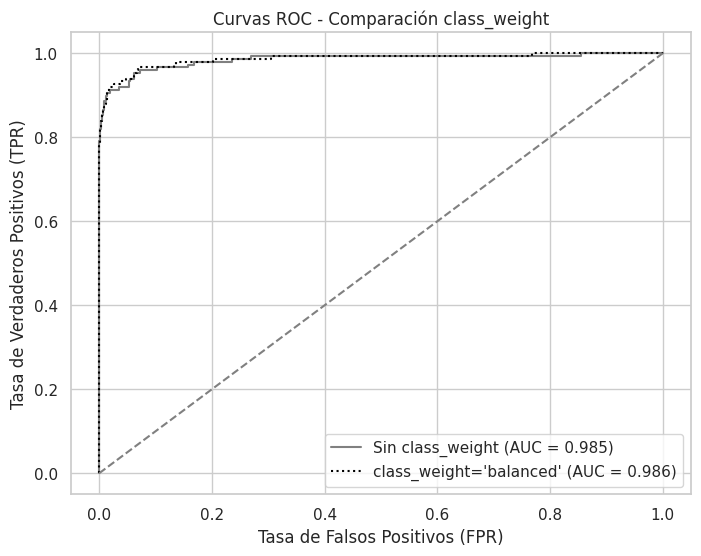

In [126]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# --- Modelo 1: class_weight=None ---
model_none = LogisticRegression(class_weight=None, random_state=1505813)
model_none.fit(X_train, y_train)

# Probabilidades de la clase positiva
y_proba_none = model_none.predict_proba(X_test)[:, 1]

# Curva ROC y AUC
fpr_none, tpr_none, thresholds_none = roc_curve(y_test, y_proba_none)
auc_none = roc_auc_score(y_test, y_proba_none)

# --- Modelo 2: class_weight='balanced' ---
model_bal = LogisticRegression(class_weight='balanced', random_state=1505813)
model_bal.fit(X_train, y_train)

# Probabilidades de la clase positiva
y_proba_bal = model_bal.predict_proba(X_test)[:, 1]

# Curva ROC y AUC
fpr_bal, tpr_bal, thresholds_bal = roc_curve(y_test, y_proba_bal)
auc_bal = roc_auc_score(y_test, y_proba_bal)

# --- Gráfico de ambas curvas ---
plt.figure(figsize=(8,6))

# Modelo sin class_weight
plt.plot(fpr_none, tpr_none, color='grey',
         label=f"Sin class_weight (AUC = {auc_none:.3f})")

# Modelo con class_weight='balanced'
plt.plot(fpr_bal, tpr_bal, color='black',linestyle='dotted',
         label=f"class_weight='balanced' (AUC = {auc_bal:.3f})")

# Línea de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.title("Curvas ROC - Comparación class_weight")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
